In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [2]:
ls data/sports_scores/

astros_1A10.csv*   Rice_10H80.csv*    Tex_15E40.csv*
dynamo_10H30.csv*  rockets_1A10.csv*  UH_10H50.csv*


In [3]:
ls data/crime_beat/

crime_10H30_10_17.csv*  crime_10H80_10_17.csv*  crime_1A10_10_17.csv*
crime_10H50_10_17.csv*  crime_15E40_10_17.csv*


In [4]:
games = 'data/sports_scores/astros_1A10.csv'
crime = 'data/crime_beat/crime_1A10_10_17.csv'

# scores df

In [5]:
df = pd.read_csv(games,index_col='date').sort_index(ascending=True)

## win column
df['win'] =  np.where(df['team_score'] > df['opp_score'],1,0)

# only oposing name and win boolean
df = df[['opposing','win','beat']]

# show

df.head()

,opposing,win,beat
date,,,
2010-04-05,SFG,0,1A10
2010-04-06,SFG,0,1A10
2010-04-07,SFG,0,1A10
2010-04-09,PHI,0,1A10
2010-04-10,PHI,0,1A10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 2010-04-05 to 2017-10-29
Data columns (total 3 columns):
opposing    658 non-null object
win         658 non-null int64
beat        658 non-null object
dtypes: int64(1), object(2)
memory usage: 20.6+ KB


# Crime df

In [7]:
# crime_df = pd.read_csv(crime).sort_index(ascending=True)

# crime_df['Date_Hour'] = pd.to_datetime(crime_df['Date_Hour'])
# crime_df['Date_Hour'] = crime_df['Date_Hour'].dt.date

# crime_df = crime_df.set_index('Date_Hour')


# # selectd columns
# crime_df = crime_df[['OffenseType']]

# # count Offense type given date
# date_crimes = crime_df.groupby(crime_df.index)['OffenseType',].count()

# ## show
# date_crimes.head()




crime_df = pd.read_csv(crime).sort_index(ascending=True)

crime_df['Date_Hour'] = pd.to_datetime(crime_df['Date_Hour'])
crime_df['Date_Hour'] = crime_df['Date_Hour'].dt.date

crime_df = crime_df.set_index('Date_Hour')


# # selectd columns
crime_df = crime_df[['OffenseType']]

# count Offense type given date
date_crimes = crime_df.groupby(crime_df.index)['OffenseType',].count()

## show
date_crimes.head()











,OffenseType
Date_Hour,
2010-01-01,11
2010-01-02,11
2010-01-03,8
2010-01-04,6
2010-01-05,5


In [8]:
crime_dum = pd.get_dummies(crime_df)

In [9]:
crime_dum.head()

,OffenseType_Aggravated Assault,OffenseType_Auto Theft,OffenseType_Burglary,OffenseType_Murder,OffenseType_Rape,OffenseType_Robbery,OffenseType_Theft
Date_Hour,,,,,,,
2010-01-01,0,1,0,0,0,0,0
2010-01-01,0,0,0,0,0,0,1
2010-01-01,0,0,1,0,0,0,0
2010-01-01,0,0,0,0,0,0,1
2010-01-01,0,0,0,0,0,0,1


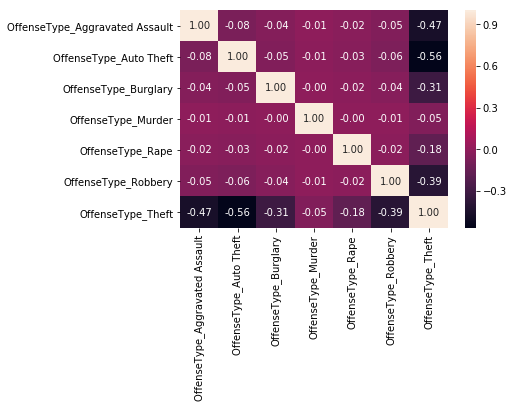

In [10]:
sns.heatmap(crime_dum.corr(), annot=True, fmt=".2f")


ValueError: Could not interpret input 'Hour'

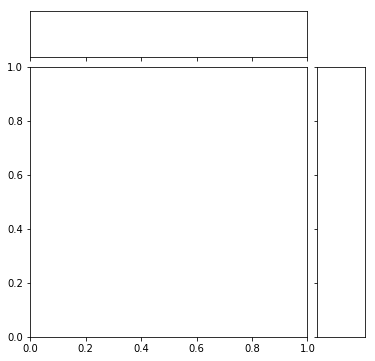

In [11]:
sns.jointplot(data=crime_df, x='Hour', y='OffenseType', kind='reg', color='g')


In [ ]:
crime_df = pd.read_csv(crime).sort_index(ascending=True)

crime_df.head()

In [ ]:
len(crime_df.Premise.value_counts())

In [ ]:
crime_df.Premise.value_counts()

# Days Df
- create a df with everyday timestamp from Jan 2010 to Dec 2017

In [12]:
days = pd.date_range(start='01/01/2010', end='12/31/2017')
days = pd.DataFrame(days)

days.columns = ['days']
days = days.set_index('days').sort_index(ascending=True)
days.head()

""
days
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05


In [ ]:
365 * 8

In [ ]:
len(days)/365

In [ ]:
days.tail()

# Merge days df with crimes_df

In [13]:
calendar_crimes = pd.merge(days,date_crimes,  left_index=True, right_index=True, how='left')
calendar_crimes.head()

,OffenseType
days,
2010-01-01,11.0
2010-01-02,11.0
2010-01-03,8.0
2010-01-04,6.0
2010-01-05,5.0


In [14]:
calendar_crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2010-01-01 to 2017-12-31
Data columns (total 1 columns):
OffenseType    2891 non-null float64
dtypes: float64(1)
memory usage: 125.7 KB


In [15]:
calendar_crimes.OffenseType.value_counts(dropna=False)

 5.0     459
 4.0     453
 3.0     402
 6.0     353
 2.0     282
 7.0     274
 8.0     205
 1.0     149
 9.0     118
 10.0     61
 11.0     35
NaN       31
 12.0     30
 13.0     21
 14.0     19
 15.0      7
 18.0      5
 16.0      4
 17.0      4
 21.0      3
 20.0      3
 19.0      2
 22.0      1
 36.0      1
Name: OffenseType, dtype: int64

## Change nans with 0

In [16]:
calendar_crimes.OffenseType.replace( np.nan,0, inplace=True)

In [17]:
calendar_crimes.OffenseType.value_counts(dropna=False)

5.0     459
4.0     453
3.0     402
6.0     353
2.0     282
7.0     274
8.0     205
1.0     149
9.0     118
10.0     61
11.0     35
0.0      31
12.0     30
13.0     21
14.0     19
15.0      7
18.0      5
16.0      4
17.0      4
21.0      3
20.0      3
19.0      2
22.0      1
36.0      1
Name: OffenseType, dtype: int64

In [18]:
calendar_crimes.head()

,OffenseType
days,
2010-01-01,11.0
2010-01-02,11.0
2010-01-03,8.0
2010-01-04,6.0
2010-01-05,5.0


# merge calendar_crimes with score

In [19]:
merge_data = pd.merge(calendar_crimes,df,  left_index=True, right_index=True, how='left')

# change column names
#merge_data.columns = ['offenses','away_team','win']

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2010-01-01 to 2017-12-31
Data columns (total 4 columns):
OffenseType    2923 non-null float64
opposing       658 non-null object
win            658 non-null float64
beat           658 non-null object
dtypes: float64(2), object(2)
memory usage: 114.2+ KB


In [20]:
merge_data.head()

,OffenseType,opposing,win,beat
2010-01-01,11.0,NaN,NaN,NaN
2010-01-02,11.0,NaN,NaN,NaN
2010-01-03,8.0,NaN,NaN,NaN
2010-01-04,6.0,NaN,NaN,NaN
2010-01-05,5.0,NaN,NaN,NaN


## Change nan value on beat to beat value

In [21]:
merge_data.beat.value_counts(dropna=False)

NaN     2265
1A10     658
Name: beat, dtype: int64

In [22]:
merge_data.beat.replace( np.nan,'1A10', inplace=True)

In [23]:
merge_data.beat.value_counts(dropna=False)

1A10    2923
Name: beat, dtype: int64

## Cleanup colums

In [24]:
merge_data.columns  = ['crime', 'away_team', 'won','beat']

In [25]:
merge_data.head()

,crime,away_team,won,beat
2010-01-01,11.0,NaN,NaN,1A10
2010-01-02,11.0,NaN,NaN,1A10
2010-01-03,8.0,NaN,NaN,1A10
2010-01-04,6.0,NaN,NaN,1A10
2010-01-05,5.0,NaN,NaN,1A10


In [26]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2010-01-01 to 2017-12-31
Data columns (total 4 columns):
crime        2923 non-null float64
away_team    658 non-null object
won          658 non-null float64
beat         2923 non-null object
dtypes: float64(2), object(2)
memory usage: 114.2+ KB


In [27]:
merge_data.crime.value_counts(dropna=False)

5.0     459
4.0     453
3.0     402
6.0     353
2.0     282
7.0     275
8.0     205
1.0     149
9.0     118
10.0     61
11.0     35
0.0      31
12.0     30
13.0     21
14.0     19
15.0      7
18.0      5
16.0      4
17.0      4
21.0      3
20.0      3
19.0      2
22.0      1
36.0      1
Name: crime, dtype: int64

In [28]:
merge_data.crime = merge_data.crime.astype(int)

In [29]:
merge_data.crime.value_counts(dropna=False)

5     459
4     453
3     402
6     353
2     282
7     275
8     205
1     149
9     118
10     61
11     35
0      31
12     30
13     21
14     19
15      7
18      5
17      4
16      4
21      3
20      3
19      2
36      1
22      1
Name: crime, dtype: int64

In [30]:
merge_data.head()

,crime,away_team,won,beat
2010-01-01,11,NaN,NaN,1A10
2010-01-02,11,NaN,NaN,1A10
2010-01-03,8,NaN,NaN,1A10
2010-01-04,6,NaN,NaN,1A10
2010-01-05,5,NaN,NaN,1A10


In [31]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2010-01-01 to 2017-12-31
Data columns (total 4 columns):
crime        2923 non-null int64
away_team    658 non-null object
won          658 non-null float64
beat         2923 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 114.2+ KB


# Display non-nans

In [32]:
merge_data.dropna(subset=['away_team', 'won'])

,crime,away_team,won,beat
2010-04-05,12,SFG,0.0,1A10
2010-04-06,7,SFG,0.0,1A10
2010-04-07,6,SFG,0.0,1A10
2010-04-09,9,PHI,0.0,1A10
2010-04-10,9,PHI,0.0,1A10
2010-04-11,6,PHI,0.0,1A10
2010-04-20,2,FLA,1.0,1A10
2010-04-21,1,FLA,1.0,1A10
2010-04-22,7,FLA,0.0,1A10
2010-04-23,8,PIT,1.0,1A10


## Add sport col

In [33]:
merge_data['sport'] = 'bas'

In [34]:
merge_data.head()

,crime,away_team,won,beat,sport
2010-01-01,11,NaN,NaN,1A10,bas
2010-01-02,11,NaN,NaN,1A10,bas
2010-01-03,8,NaN,NaN,1A10,bas
2010-01-04,6,NaN,NaN,1A10,bas
2010-01-05,5,NaN,NaN,1A10,bas


In [35]:
merge_data = merge_data[['crime','won','beat', 'sport']]

In [36]:
merge_data.head()

,crime,won,beat,sport
2010-01-01,11,NaN,1A10,bas
2010-01-02,11,NaN,1A10,bas
2010-01-03,8,NaN,1A10,bas
2010-01-04,6,NaN,1A10,bas
2010-01-05,5,NaN,1A10,bas


In [37]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2010-01-01 to 2017-12-31
Data columns (total 4 columns):
crime    2923 non-null int64
won      658 non-null float64
beat     2923 non-null object
sport    2923 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 194.2+ KB


In [38]:
def game_feature(df):
    if df.won == 1:
        val = 'Won_Game'
    elif df.won == 0:
        val = 'Lost_Game'
    else:
        val = 'No_Game'
    return val

merge_data['game'] = merge_data.apply(game_feature,axis=1)

In [39]:
merge_data.head()

,crime,won,beat,sport,game
2010-01-01,11,NaN,1A10,bas,No_Game
2010-01-02,11,NaN,1A10,bas,No_Game
2010-01-03,8,NaN,1A10,bas,No_Game
2010-01-04,6,NaN,1A10,bas,No_Game
2010-01-05,5,NaN,1A10,bas,No_Game


In [40]:
merge_data.won.value_counts(dropna=False)

NaN     2265
 0.0     336
 1.0     322
Name: won, dtype: int64

In [44]:
merge_data

,crime,beat,sport,game
2010-01-01,11,1A10,bas,No_Game
2010-01-02,11,1A10,bas,No_Game
2010-01-03,8,1A10,bas,No_Game
2010-01-04,6,1A10,bas,No_Game
2010-01-05,5,1A10,bas,No_Game
2010-01-06,7,1A10,bas,No_Game
2010-01-07,8,1A10,bas,No_Game
2010-01-08,4,1A10,bas,No_Game
2010-01-09,10,1A10,bas,No_Game
2010-01-10,8,1A10,bas,No_Game


In [42]:
merge_data = merge_data[['crime','beat','sport','game']]

In [ ]:
merge_data.to_csv('data/final/redo_Astros1017_final.csv')

In [ ]:
merge_data.head()
merge_data.columns = ['1A10_crime','beat','sports','bas_game']

In [ ]:
merge_data.head()

In [ ]:
pd.get_dummies(merge_data)

In [ ]:
merge_data.add_prefix('1A10_')
